In [142]:
import pandas as pd

In [143]:
data=pd.read_csv("data_donnees_2021_ind_v2.csv")

In [144]:
data

,PPSORT,ABOID,AGEGRP,AGEIMM,ATTSCH,BFNMEMB,BedRm,CFInc,CFInc_AT,CFSTAT,...,WT7,WT8,WT9,WT10,WT11,WT12,WT13,WT14,WT15,WT16
0,1,6,13,7,1,0,4,30,27,2,...,22.901,22.901,22.901,249.279,22.901,22.901,22.901,22.901,22.901,22.901
1,2,6,11,5,1,0,3,18,18,2,...,22.894,22.894,22.894,22.894,22.894,22.894,22.894,22.894,22.894,22.894
2,3,1,13,99,1,0,0,7,7,6,...,22.901,22.901,22.901,22.901,22.901,22.901,22.901,22.901,22.901,22.901
3,4,6,16,99,1,0,4,15,15,2,...,22.877,22.877,22.877,22.877,22.877,22.877,22.877,22.877,22.877,22.877
4,5,6,18,99,1,0,3,13,13,3,...,22.901,22.901,22.901,22.901,22.901,22.901,22.901,22.901,22.901,22.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980863,980864,6,6,99,2,0,3,14,14,5,...,22.894,22.894,22.894,22.894,22.894,22.894,22.894,22.894,22.894,22.894
980864,980865,6,5,99,9,0,4,33,32,4,...,22.877,22.877,22.877,22.877,22.877,22.877,22.877,22.877,22.877,22.877
980865,980866,6,10,99,1,0,4,32,30,2,...,22.894,22.894,22.894,22.894,249.199,22.894,22.894,22.894,22.894,22.894
980866,980867,6,14,99,1,0,3,2,2,6,...,22.901,22.901,22.901,249.281,22.901,22.901,22.901,22.901,22.901,22.901


In [145]:
# Sélection des colonnes pertinentes pour l'analyse
df=data[["HHTYPE","HHInc_AT","SHELCO","HHSIZE","PR","DTYPE","BedRm"]]

In [146]:
# Filtrage des provinces de l'Ontario (PR=35) et de la Colombie Britannique (PR=59)
df = df[df["PR"].isin([35, 59])]

In [147]:
# Dictionnaire de correspondance
province_map = {
    35: "Ontario",
    59: "C-B"}

# Remplacer les valeurs de la colonne PR
df = df.copy()
df['PR'] = df['PR'].map(province_map)

In [148]:
df

,HHTYPE,HHInc_AT,SHELCO,HHSIZE,PR,DTYPE,BedRm
1,2,18,1400,4,Ontario,1,3
5,3,22,1200,3,C-B,1,4
7,1,27,600,2,Ontario,3,4
8,2,24,2800,6,Ontario,1,4
9,2,22,1600,4,Ontario,1,4
...,...,...,...,...,...,...,...
980860,6,27,1600,4,Ontario,1,3
980861,2,23,500,3,Ontario,1,4
980863,5,14,2300,3,Ontario,3,3
980865,2,30,4913,4,Ontario,1,4


In [149]:
#Renommer la colonne HHTYPE
df.rename(columns={"HHTYPE": "Type de ménage"}, inplace=True)

In [150]:
# Exclure les ménages avec type 88 (non disponible)
df = df[df["Type de ménage"] != 88].copy()

In [151]:
# Supprimer les observations dont le code BedRm = 8 (données manquantes)
df= df[df["BedRm"] != 8].copy()

In [152]:
df

,Type de ménage,HHInc_AT,SHELCO,HHSIZE,PR,DTYPE,BedRm
1,2,18,1400,4,Ontario,1,3
5,3,22,1200,3,C-B,1,4
7,1,27,600,2,Ontario,3,4
8,2,24,2800,6,Ontario,1,4
9,2,22,1600,4,Ontario,1,4
...,...,...,...,...,...,...,...
980860,6,27,1600,4,Ontario,1,3
980861,2,23,500,3,Ontario,1,4
980863,5,14,2300,3,Ontario,3,3
980865,2,30,4913,4,Ontario,1,4


In [153]:
# Mapper les codes de revenu vers les médianes

income_map = {
    1: 1000,       
    2: (2000 + 4999)//2,   
    3: (5000 + 6999)//2,   
    4: (7000 + 9999)//2,   
    5: (10000 + 11999)//2, 
    6: (12000 + 14999)//2, 
    7: (15000 + 16999)//2, 
    8: (17000 + 19999)//2, 
    9: (20000 + 24999)//2, 
    10: (25000 + 29999)//2,
    11: (30000 + 34999)//2,
    12: (35000 + 39999)//2,
    13: (40000 + 44999)//2,
    14: (45000 + 49999)//2,
    15: (50000 + 54999)//2,
    16: (55000 + 59999)//2,
    17: (60000 + 64999)//2,
    18: (65000 + 69999)//2,
    19: (70000 + 74999)//2,
    20: (75000 + 79999)//2,
    21: (80000 + 84999)//2,
    22: (85000 + 89999)//2,
    23: (90000 + 94999)//2,
    24: (95000 + 99999)//2,
    25: (100000 + 109999)//2, 
    26: (110000 + 119999)//2, 
    27: (120000 + 134999)//2, 
    28: (135000 + 149999)//2,
    29: (150000 + 174999)//2,  
    30: (175000 + 199999)//2,  
    31: (200000 + 249999)//2, 
    32: 275000,}
df = df.copy()
df["HHInc_AT_median"] = df["HHInc_AT"].map(income_map)

In [154]:
# Création d'une nouvelle variable ratio_logement_revenu
df["ratio_logement_revenu"] = (df["SHELCO"] * 12) / df["HHInc_AT_median"]

In [155]:
# Suppression des lignes avec revenus non disponibles
df = df.dropna(subset=["HHInc_AT_median"])

In [156]:
# Vérification de l'existence des valeurs manquantes
df.isnull().values.any()

np.False_

Q1 = 0.123, Q3 = 0.308, IQR = 0.185
Borne inférieure = -0.154, Borne supérieure = 0.585


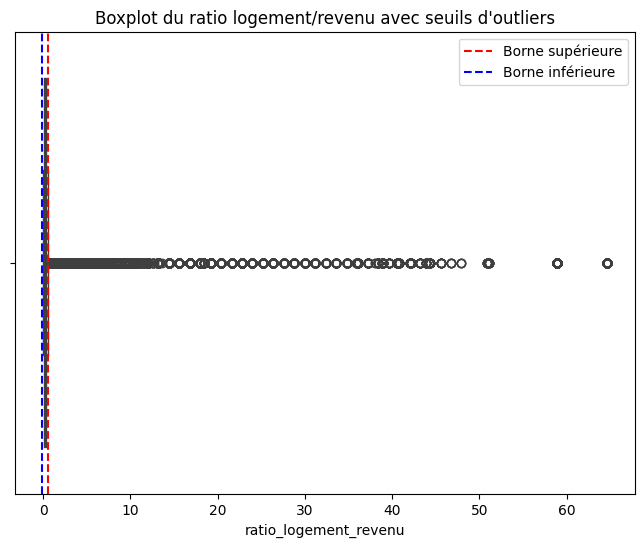

In [157]:
# Vérification de l'existence des valeurs aberrantes via le boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul des quartiles et de l’IQR
Q1 = df['ratio_logement_revenu'].quantile(0.25)
Q3 = df['ratio_logement_revenu'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

print(f"Q1 = {Q1:.3f}, Q3 = {Q3:.3f}, IQR = {IQR:.3f}")
print(f"Borne inférieure = {borne_inf:.3f}, Borne supérieure = {borne_sup:.3f}")

# Visualisation avec un boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['ratio_logement_revenu'])
plt.axvline(borne_sup, color="red", linestyle="--", label="Borne supérieure")
plt.axvline(borne_inf, color="blue", linestyle="--", label="Borne inférieure")
plt.legend()
plt.title("Boxplot du ratio logement/revenu avec seuils d'outliers")
plt.show()

In [158]:
# Catégorisation selon le seuil d'abordabilité de 30% défini par Statistiques Canada
def categoriser_ratio(x):
    if x <= 0.30:
        return "Abordable"
    elif 0.30 < x <= 1.00:
        return "Non abordable (charge élevée)"
    else:
        return "Dépassement du revenu"

df["categorie_ratio"] = df["ratio_logement_revenu"].apply(categoriser_ratio)

# Vérification de la répartition des catégories
df["categorie_ratio"].value_counts(normalize=True).round(3)

categorie_ratio
Abordable                       0.738
Non abordable (charge élevée)   0.237
Dépassement du revenu           0.025
Name: proportion, dtype: float64

In [159]:
# Compter le nombre de ménages par province et par catégorie
counts = df.groupby(["PR", "categorie_ratio"]).size().reset_index(name="nb_menages")

# Calculer la proportion dans chaque province
total_par_province = df.groupby("PR").size().reset_index(name="total_menages")
# Fusionner pour calculer la proportion
stats_province = counts.merge(total_par_province, on="PR")
stats_province["proportion"] = (stats_province["nb_menages"] / stats_province["total_menages"]).round(3)

# Affichage final
stats_province = stats_province[["PR", "categorie_ratio", "nb_menages", "proportion"]]
print(stats_province)

        PR                categorie_ratio  nb_menages  proportion
0      C-B                      Abordable       96523       0.730
1      C-B          Dépassement du revenu        4164       0.032
2      C-B  Non abordable (charge élevée)       31463       0.238
3  Ontario                      Abordable      279294       0.740
4  Ontario          Dépassement du revenu        8617       0.023
5  Ontario  Non abordable (charge élevée)       89294       0.237


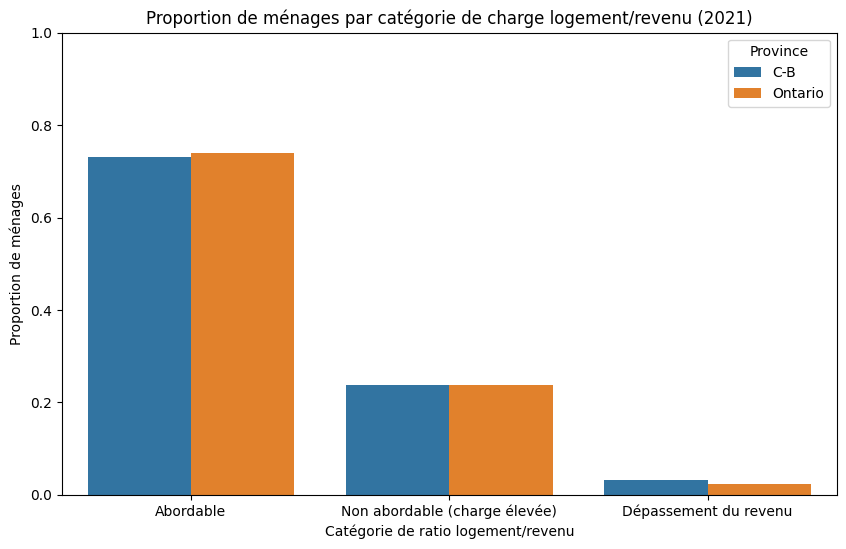

In [160]:
# Visualisation des proportions dans chaque province

import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques déjà calculées
stats_data = {
    "PR": ["C-B", "C-B", "C-B", "Ontario", "Ontario", "Ontario"],
    "categorie_ratio": ["Abordable", "Non abordable (charge élevée)", "Dépassement du revenu",
                        "Abordable", "Non abordable (charge élevée)", "Dépassement du revenu"],
    "proportion": [0.730, 0.238, 0.032, 0.740, 0.237, 0.023]
}

import pandas as pd
stats_df = pd.DataFrame(stats_data)

# Création du graphique
plt.figure(figsize=(10,6))
sns.barplot(data=stats_df, x="categorie_ratio", y="proportion", hue="PR")
plt.title("Proportion de ménages par catégorie de charge logement/revenu (2021)")
plt.ylabel("Proportion de ménages")
plt.xlabel("Catégorie de ratio logement/revenu")
plt.ylim(0,1)
plt.legend(title="Province")
plt.show()

In [161]:
# Statistiques par province et type de ménage
stats_type_menage = df.groupby(["PR", "Type de ménage", "categorie_ratio"]).agg(
    nb_menages=("categorie_ratio", "count")
).reset_index()

# Calcul des proportions pour chaque type de ménage dans chaque province
stats_type_menage["proportion"] = stats_type_menage.groupby(["PR", "Type de ménage"])["nb_menages"].transform(lambda x: x / x.sum())

stats_type_menage

,PR,Type de ménage,categorie_ratio,nb_menages,proportion
0,C-B,1,Abordable,23564,0.810
1,C-B,1,Dépassement du revenu,604,0.021
2,C-B,1,Non abordable (charge élevée),4934,0.170
3,C-B,2,Abordable,35805,0.753
4,C-B,2,Dépassement du revenu,1038,0.022
5,C-B,2,Non abordable (charge élevée),10680,0.225
6,C-B,3,Abordable,2439,0.817
7,C-B,3,Dépassement du revenu,46,0.015
8,C-B,3,Non abordable (charge élevée),500,0.168
9,C-B,4,Abordable,5269,0.781


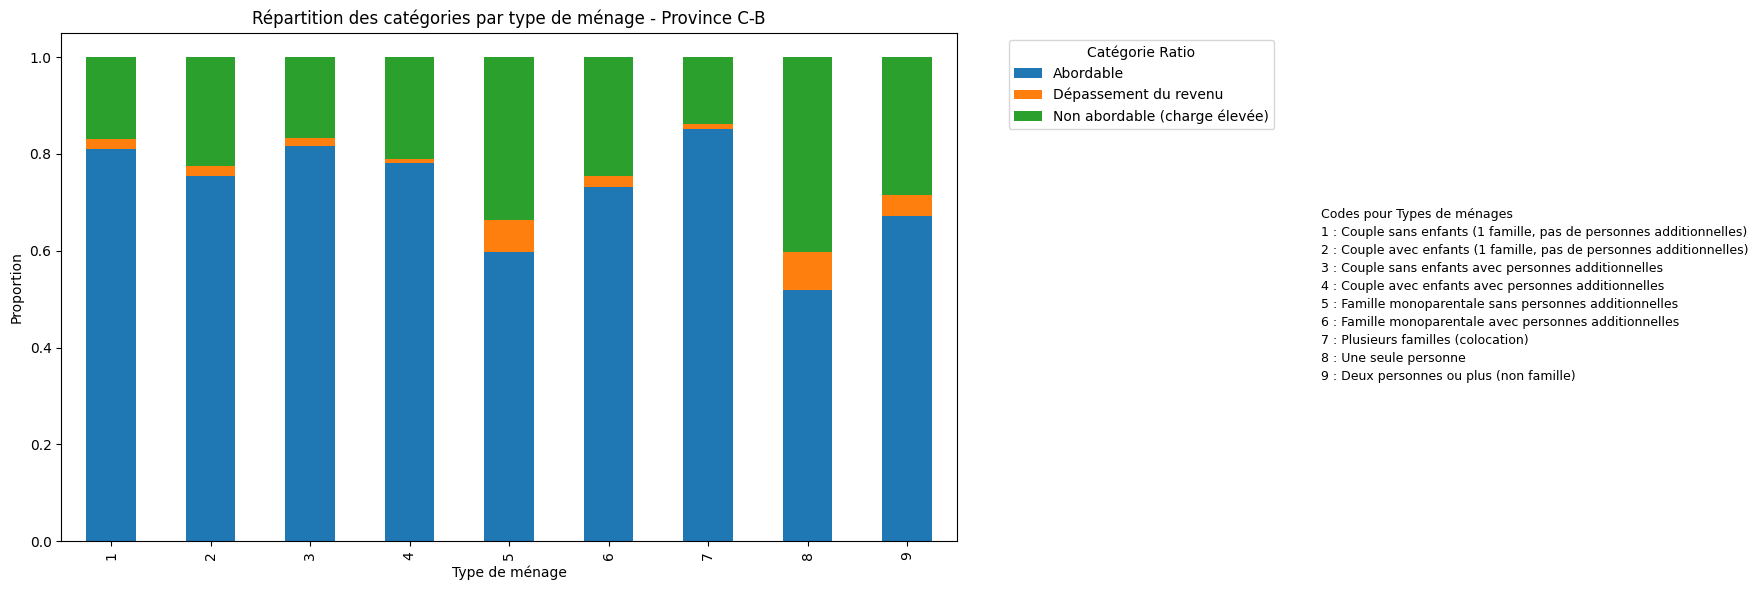

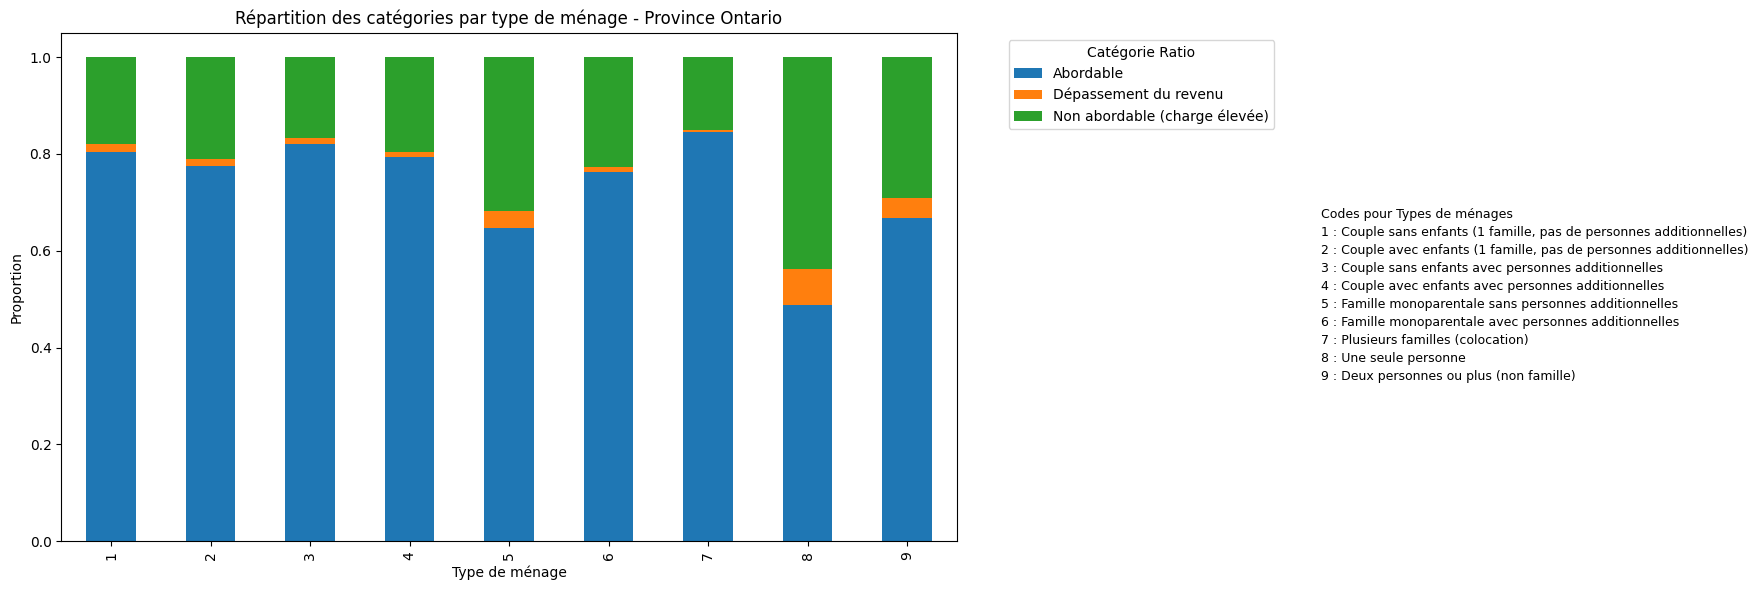

In [162]:
# Visualisation des statistiques par province et type de ménage

# Dictionnaire des explications pour Type de ménage
legende_type_menage = {
    1: "1 : Couple sans enfants (1 famille, pas de personnes additionnelles)",
    2: "2 : Couple avec enfants (1 famille, pas de personnes additionnelles)",
    3: "3 : Couple sans enfants avec personnes additionnelles",
    4: "4 : Couple avec enfants avec personnes additionnelles",
    5: "5 : Famille monoparentale sans personnes additionnelles",
    6: "6 : Famille monoparentale avec personnes additionnelles",
    7: "7 : Plusieurs familles (colocation)",
    8: "8 : Une seule personne",
    9: "9 : Deux personnes ou plus (non famille)"
}

# pivotons les données pour plus de clarté
pivot_df = stats_type_menage.pivot_table(
    index=["PR", "Type de ménage"],
    columns="categorie_ratio",
    values="proportion",
    fill_value=0
).reset_index()


# Génération du texte de la légende avec un titre
legende_title = "Codes pour Types de ménages"
legende_text = legende_title + "\n" + "\n".join([legende_type_menage[k] for k in sorted(legende_type_menage.keys())])

# Création des graphiques par province
for province in pivot_df["PR"].unique():
    subset = pivot_df[pivot_df["PR"] == province]
    subset = subset.set_index("Type de ménage")
    
    ax = subset.plot(
        kind="bar",
        stacked=True,
        figsize=(13, 6),
        title=f"Répartition des catégories par type de ménage - Province {province}"
    )
    
    plt.ylabel("Proportion")
    plt.xlabel("Type de ménage")
    plt.legend(title="Catégorie Ratio", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajout de la légende explicative avec un titre
    plt.gcf().text(1.02, 0.5, legende_text, fontsize=9, va='center', ha='left', linespacing=1.5)

    plt.tight_layout()
    plt.show()

In [163]:
# Statistiques de base : moyenne et médiane du ratio logement/revenu
stats_ratio = (
    df.groupby(["PR", "Type de ménage"])["ratio_logement_revenu"]
      .agg(moyenne="mean", mediane="median", effectif="count")
      .reset_index()
)

# Tri par province et par moyenne décroissante pour faciliter la lecture
stats_ratio = stats_ratio.sort_values(by=["PR", "moyenne"], ascending=[True, False])

display(stats_ratio)

,PR,Type de ménage,moyenne,mediane,effectif
7,C-B,8,0.860,0.288,16219
4,C-B,5,0.785,0.254,10011
8,C-B,9,0.664,0.230,7013
1,C-B,2,0.419,0.208,47523
2,C-B,3,0.388,0.168,2985
0,C-B,1,0.364,0.167,29102
3,C-B,4,0.324,0.194,6747
5,C-B,6,0.306,0.202,2933
6,C-B,7,0.248,0.168,9617
16,Ontario,8,0.783,0.305,39218


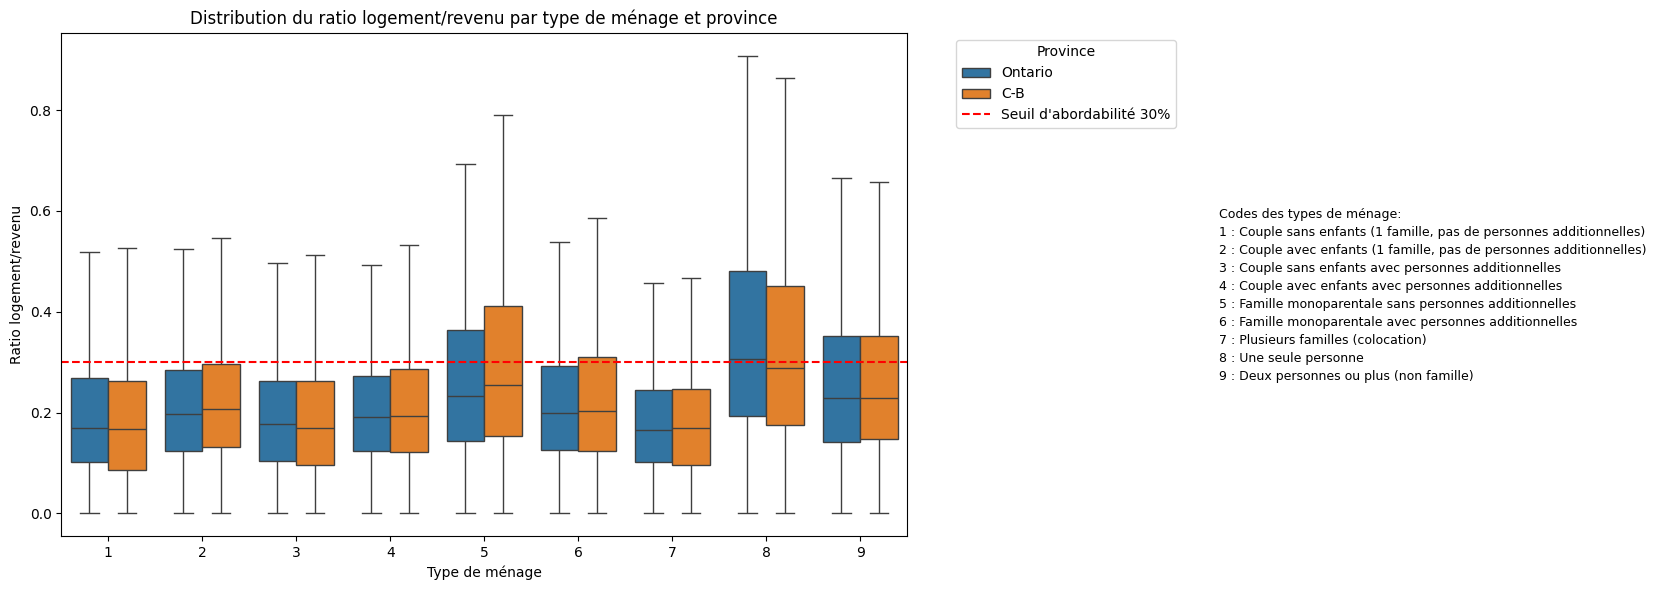

In [164]:
# Visualisation du ratio logement/revenu par type de ménage et province, via le boxplot

plt.figure(figsize=(12,6))
sns.boxplot(
    x="Type de ménage", 
    y="ratio_logement_revenu", 
    hue="PR", 
    data=df, 
    showfliers=False
)

# Ligne du seuil d'abordabilité
plt.axhline(0.3, color="red", linestyle="--", label="Seuil d'abordabilité 30%")

# Titres et axes
plt.title("Distribution du ratio logement/revenu par type de ménage et province")
plt.xlabel("Type de ménage")
plt.ylabel("Ratio logement/revenu")

# Légende des provinces (hue)
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajouter la légende explicative pour les types de ménage sur le côté droit
legende_text = "Codes des types de ménage:\n" + "\n".join([v for k,v in sorted(legende_type_menage.items())])
plt.gcf().text(1.02, 0.5, legende_text, fontsize=9, va='center', ha='left', linespacing=1.5)

plt.tight_layout()
plt.show()

In [165]:
# Statistiques par nombre de chambres à coucher
stats_bedroom = (
    df.groupby(["PR", "BedRm"])["ratio_logement_revenu"]
      .agg(moyenne="mean", mediane="median", effectif="count")
      .reset_index()
)

display(stats_bedroom)

,PR,BedRm,moyenne,mediane,effectif
0,C-B,0,0.793,0.288,956
1,C-B,1,0.723,0.262,13728
2,C-B,2,0.508,0.218,30034
3,C-B,3,0.389,0.192,37440
4,C-B,4,0.459,0.187,27030
5,C-B,5,0.464,0.198,22962
6,Ontario,0,0.643,0.278,1691
7,Ontario,1,0.673,0.279,29491
8,Ontario,2,0.503,0.230,65486
9,Ontario,3,0.326,0.192,135747


In [166]:
# Corrélation entre ratio_logement_revenu et BedRm

df["ratio_logement_revenu"].corr(df["BedRm"])

np.float64(-0.03387556275702436)

In [167]:
# Calcul de la corrélation par province
correlations_province = df.groupby("PR").apply(
    lambda x: x["ratio_logement_revenu"].corr(x["BedRm"])
).reset_index(name="corr_BedRm_ratio")

print(correlations_province)

        PR  corr_BedRm_ratio
0      C-B            -0.021
1  Ontario            -0.040


C:\Users\Owner\AppData\Local\Temp\ipykernel_49268\3048394875.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations_province = df.groupby("PR").apply(


C:\Users\Owner\AppData\Local\Temp\ipykernel_49268\2978078118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


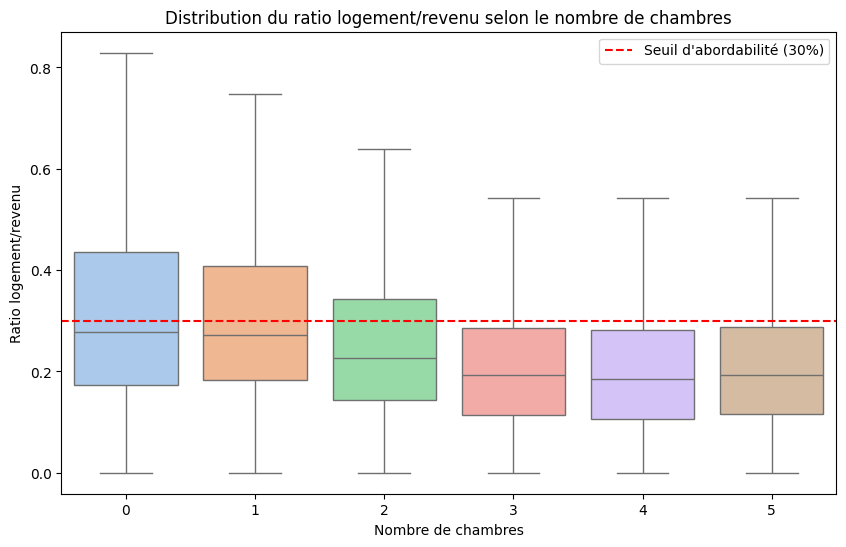

In [168]:
# Visualisation de la distribution du ratio selon la taille du logement

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="BedRm",
    y="ratio_logement_revenu",
    showfliers=False,
    palette="pastel"
)
plt.axhline(0.3, color='red', linestyle='--', label='Seuil d\'abordabilité (30%)')
plt.title("Distribution du ratio logement/revenu selon le nombre de chambres")
plt.xlabel("Nombre de chambres")
plt.ylabel("Ratio logement/revenu")
plt.legend()
plt.show()

In [169]:
# Calcul de l'IQR (écart interquartile) par type de ménage et province
stats_dispersion = (
    df.groupby(["PR", "Type de ménage"])["ratio_logement_revenu"]
    .agg(
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75),
        IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
        mediane="median",
        moyenne="mean",
        effectif="count"
    )
    .reset_index()
)

# Tri pour une lecture plus claire
stats_dispersion = stats_dispersion.sort_values(by=["PR", "IQR"], ascending=[True, False])

# Affichage
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
display(stats_dispersion)


,PR,Type de ménage,Q1,Q3,IQR,mediane,moyenne,effectif
7,C-B,8,0.175,0.452,0.277,0.288,0.860,16219
4,C-B,5,0.154,0.411,0.258,0.254,0.785,10011
8,C-B,9,0.148,0.352,0.205,0.230,0.664,7013
5,C-B,6,0.124,0.311,0.187,0.202,0.306,2933
0,C-B,1,0.086,0.264,0.177,0.167,0.364,29102
2,C-B,3,0.096,0.263,0.167,0.168,0.388,2985
1,C-B,2,0.131,0.297,0.166,0.208,0.419,47523
3,C-B,4,0.122,0.287,0.165,0.194,0.324,6747
6,C-B,7,0.096,0.246,0.150,0.168,0.248,9617
16,Ontario,8,0.194,0.480,0.286,0.305,0.783,39218


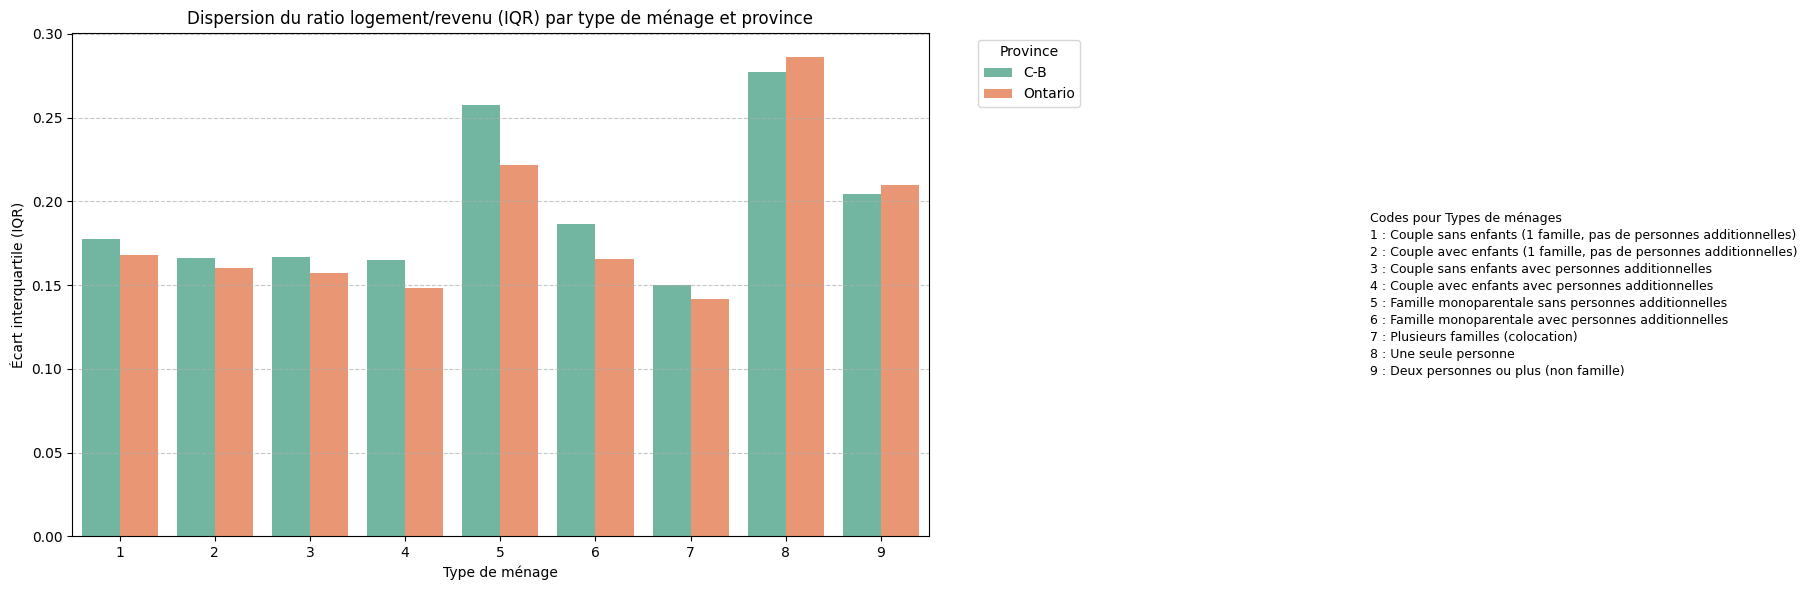

In [170]:
# Visualisation de la dispersion du ratio logement/revenu 

# Dictionnaire explicatif
legende_type_menage = {
    1: "1 : Couple sans enfants (1 famille, pas de personnes additionnelles)",
    2: "2 : Couple avec enfants (1 famille, pas de personnes additionnelles)",
    3: "3 : Couple sans enfants avec personnes additionnelles",
    4: "4 : Couple avec enfants avec personnes additionnelles",
    5: "5 : Famille monoparentale sans personnes additionnelles",
    6: "6 : Famille monoparentale avec personnes additionnelles",
    7: "7 : Plusieurs familles (colocation)",
    8: "8 : Une seule personne",
    9: "9 : Deux personnes ou plus (non famille)"
}

# Génération du texte de la légende explicative
legende_title = "Codes pour Types de ménages"
legende_text = legende_title + "\n" + "\n".join([legende_type_menage[k] for k in sorted(legende_type_menage.keys())])

# Création du graphique
plt.figure(figsize=(11, 6))
sns.barplot(
    x="Type de ménage",
    y="IQR",
    hue="PR",
    data=stats_dispersion,
    palette="Set2"
)

plt.title("Dispersion du ratio logement/revenu (IQR) par type de ménage et province")
plt.xlabel("Type de ménage")
plt.ylabel("Écart interquartile (IQR)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Légende pour les provinces
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajout de la légende explicative des types de ménages à droite
plt.gcf().text(1.25, 0.5, legende_text, fontsize=9, va='center', ha='left', linespacing=1.4)

plt.tight_layout()
plt.show()



In [171]:
# ====================================================
# Projet_Analyse de données-Sprint 3
# ====================================================

In [172]:
# ====================================================
# 1. RAPPEL DU CONTEXTE (bref résumé)
# ====================================================

print("Résumé des sprints 1 et 2 :\n")
print("""
Les deux premiers sprints ont permis de construire et d'explorer un indicateur clé : 
le ratio logement/revenu, représentant la part du revenu annuel après impôt consacrée 
aux coûts de logement. L’analyse s’est concentrée sur la Colombie-Britannique (C.-B.) 
et l’Ontario, en distinguant les types de ménages et les caractéristiques du logement.

Résultats descriptifs principaux :
- Le ratio logement/revenu moyen est plus élevé en C.-B. qu’en Ontario.
- Les ménages seuls sont les plus exposés à des ratios élevés.
- Les propriétaires ont un ratio plus faible que les locataires.
- Le ratio médian logement/revenu décroît avec le nombre de chambres, dans les deux provinces.
""")

Résumé des sprints 1 et 2 :


Les deux premiers sprints ont permis de construire et d'explorer un indicateur clé : 
le ratio logement/revenu, représentant la part du revenu annuel après impôt consacrée 
aux coûts de logement. L’analyse s’est concentrée sur la Colombie-Britannique (C.-B.) 
et l’Ontario, en distinguant les types de ménages et les caractéristiques du logement.

Résultats descriptifs principaux :
- Le ratio logement/revenu moyen est plus élevé en C.-B. qu’en Ontario.
- Les ménages seuls sont les plus exposés à des ratios élevés.
- Les propriétaires ont un ratio plus faible que les locataires.
- Le ratio médian logement/revenu décroît avec le nombre de chambres, dans les deux provinces.



In [173]:
# ====================================================
# 2. TESTS D’HYPOTHÈSES
# ====================================================

In [174]:
# Importation des bibliothèques 
import pandas as pd
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [175]:
# HYPOTHÈSE 1 – TYPE DE MÉNAGE : Le type 8 (personne seule) paie plus
type8 = df[df["Type de ménage"] == 8]["ratio_logement_revenu"]
autres = df[df["Type de ménage"] != 8]["ratio_logement_revenu"]

t_stat, p_val = ttest_ind(type8, autres, equal_var=False)
print("H1 – Type de ménage : Type 8 vs autres")
print(f"T = {t_stat:.3f}, p = {p_val:.4f}")
if p_val < 0.05 and t_stat > 0:
    print("→ Hypothèse confirmée : les ménages d’une seule personne ont un ratio logement/revenu plus élevé.\n")
else:
    print("→ Hypothèse non confirmée.\n")

H1 – Type de ménage : Type 8 vs autres
T = 32.062, p = 0.0000
→ Hypothèse confirmée : les ménages d’une seule personne ont un ratio logement/revenu plus élevé.



In [176]:
# ANOVA complémentaire : différences globales entre types de ménage
groupes = [g["ratio_logement_revenu"].values for _, g in df.groupby("Type de ménage")]
anova = f_oneway(*groupes)
print(f"ANOVA globale par type de ménage : F = {anova.statistic:.3f}, p = {anova.pvalue:.4f}")
if anova.pvalue < 0.05:
    print("→ Il existe des différences significatives entre les types de ménages.\n")
else:
    print("→ Pas de différences significatives globales.\n")

ANOVA globale par type de ménage : F = 332.898, p = 0.0000
→ Il existe des différences significatives entre les types de ménages.



In [177]:
# HYPOTHÈSE 2 – TAILLE DU LOGEMENT : plus de chambres = ratio plus faible
r, p_corr = pearsonr(df["BedRm"], df["ratio_logement_revenu"])
print("H2 – Taille du logement (nombre de chambres)")
print(f"Corrélation de Pearson : r = {r:.3f}, p = {p_corr:.4f}")
if p_corr < 0.05 and r < 0:
    print("→ Hypothèse confirmée : à mesure que le nombre de chambres augmente, le ratio logement/revenu diminue.\n")
else:
    print("→ Hypothèse non confirmée.\n")

H2 – Taille du logement (nombre de chambres)
Corrélation de Pearson : r = -0.034, p = 0.0000
→ Hypothèse confirmée : à mesure que le nombre de chambres augmente, le ratio logement/revenu diminue.



In [178]:
# HYPOTHÈSE 3 – DIFFÉRENCES PROVINCIALES : BC > Ontario
bc = df[df["PR"] == "C-B"]["ratio_logement_revenu"]
on = df[df["PR"] == "Ontario"]["ratio_logement_revenu"]

t_stat, p_val = ttest_ind(bc, on, equal_var=False)
print("H3 – Différences provinciales : BC vs Ontario")
print(f"T = {t_stat:.3f}, p = {p_val:.4f}")
if p_val < 0.05 and t_stat > 0:
    print("→ Hypothèse confirmée : le ratio logement/revenu est plus élevé en Colombie-Britannique.\n")
else:
    print("→ Hypothèse non confirmée.\n")

H3 – Différences provinciales : BC vs Ontario
T = 11.126, p = 0.0000
→ Hypothèse confirmée : le ratio logement/revenu est plus élevé en Colombie-Britannique.



In [179]:
# ====================================================
# 3. Régression multiple
# ====================================================

In [180]:
# Importation des bibliothèques 

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Variables catégorielles (Province et Type de ménage) à convertir en dummies
# (variables indicatrices) pour que chaque type de ménage et chaque province ait son propre coefficient 
df_model = df.copy()
df_model = pd.get_dummies(df_model, columns=["PR", "Type de ménage"], drop_first=True)

# Liste des variables explicatives
X_vars = [col for col in df_model.columns if col.startswith("PR_") or col.startswith("Type de ménage_")] + ["BedRm", "HHInc_AT_median"]

X = df_model[X_vars]
y = df_model["ratio_logement_revenu"]


In [181]:
# Conversion des colonnes booléennes en float
X = df_model[X_vars].astype(float)

# Variable dépendante
y = df_model["ratio_logement_revenu"].astype(float)

# Ajout de l'ordonnée à l'origine
X = sm.add_constant(X)

In [182]:
# Régression multiple
model = sm.OLS(y, X).fit()

# Résumé complet
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ratio_logement_revenu   R-squared:                       0.031
Model:                               OLS   Adj. R-squared:                  0.031
Method:                    Least Squares   F-statistic:                     1503.
Date:                   Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                           22:36:54   Log-Likelihood:            -1.1241e+06
No. Observations:                 509355   AIC:                         2.248e+06
Df Residuals:                     509343   BIC:                         2.248e+06
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

In [135]:
# Parlant du type de ménage, on constate que tous les coefficients sont significatifs sauf Type 6 (p = 0.822); 
# par conséquent, nous retirerons la variable « Type de ménage 6 » du modèle.

import pandas as pd
import statsmodels.api as sm
import numpy as np

# Sélection des variables explicatives en retirant le type de ménage 6

X_vars = [
    col for col in df_model.columns
    if (col.startswith("PR_") 
        or (col.startswith("Type de ménage_") and col != "Type de ménage_6")
        or col in ["BedRm", "HHInc_AT_median"])
]

# Extraction du X
X = df_model[X_vars].copy()
y = df_model["ratio_logement_revenu"].copy()

# Conversion en float
X = X.astype(float)
y = y.astype(float)

# Supprimer toutes les lignes qui contiennent encore des NaN
mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask]
y = y.loc[mask]

# Ajouter constante
X = sm.add_constant(X)

# Ajuster le modèle OLS
model = sm.OLS(y, X).fit()

# Résumé complet
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ratio_logement_revenu   R-squared:                       0.031
Model:                               OLS   Adj. R-squared:                  0.031
Method:                    Least Squares   F-statistic:                     1653.
Date:                   Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                           04:08:19   Log-Likelihood:            -1.1241e+06
No. Observations:                 509355   AIC:                         2.248e+06
Df Residuals:                     509344   BIC:                         2.248e+06
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

In [136]:
# Tableau clair des coefficients

coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Beta": model.params.values,
    "P-value": model.pvalues.values
})
coef_df["Signification"] = coef_df["P-value"].apply(lambda p: "Oui" if p < 0.05 else "Non")

print("\nTableau des coefficients :")
print(coef_df)


Tableau des coefficients :
            Variable   Beta  P-value Signification
0              const  0.817    0.000           Oui
1              BedRm  0.082    0.000           Oui
2    HHInc_AT_median -0.000    0.000           Oui
3         PR_Ontario -0.086    0.000           Oui
4   Type de ménage_2  0.212    0.000           Oui
5   Type de ménage_3  0.128    0.000           Oui
6   Type de ménage_4  0.229    0.000           Oui
7   Type de ménage_5  0.073    0.000           Oui
8   Type de ménage_7  0.279    0.000           Oui
9   Type de ménage_8  0.208    0.000           Oui
10  Type de ménage_9  0.203    0.000           Oui


In [140]:
# Construire l'équation de régression sous forme textuelle
equation_terms = []

for var, beta in model.params.items():
    if var == 'const':
        equation_terms.append(f"{beta:.3f}")
    else:
        equation_terms.append(f"({beta:.3f} * {var})")

# Joindre tous les termes et ajouter ϵ
equation_text = " + ".join(equation_terms) + " + ϵ"

print("Équation de régression linéaire :")
print("y =", equation_text)


Équation de régression linéaire :
y = 0.817 + (0.082 * BedRm) + (-0.000 * HHInc_AT_median) + (-0.086 * PR_Ontario) + (0.212 * Type de ménage_2) + (0.128 * Type de ménage_3) + (0.229 * Type de ménage_4) + (0.073 * Type de ménage_5) + (0.279 * Type de ménage_7) + (0.208 * Type de ménage_8) + (0.203 * Type de ménage_9) + ϵ


In [141]:
# Générer automatiquement l'équation de régression avec epsilon

coeffs = model.params

equation = "ratio_logement_revenu = "

# Ajouter l'intercept
equation += f"{coeffs['const']:.3f}"

# Ajouter les autres coefficients
for var in coeffs.index:
    if var == "const":
        continue
    sign = "+" if coeffs[var] >= 0 else "-"
    equation += f" {sign} {abs(coeffs[var]):.3f}*{var}"

# Ajouter epsilon
equation += " + ε"

print(equation)


ratio_logement_revenu = 0.817 + 0.082*BedRm - 0.000*HHInc_AT_median - 0.086*PR_Ontario + 0.212*Type de ménage_2 + 0.128*Type de ménage_3 + 0.229*Type de ménage_4 + 0.073*Type de ménage_5 + 0.279*Type de ménage_7 + 0.208*Type de ménage_8 + 0.203*Type de ménage_9 + ε
